In [209]:
"Quels sont les clients qui ont un % de commandes PVC très inférieur à leur % de commandes total"

'Quels sont les clients qui ont un % de commandes PVC très inférieur à leur % de commandes total'

In [210]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [211]:
path_data = "../data"

In [212]:
filename_ligne = "Ligne.csv"

In [213]:
path_data_ligne = os.path.join(path_data, filename_ligne)

In [214]:
df_ligne = pd.read_csv(path_data_ligne, sep=",")

c:\users\ahmed\appdata\roaming\jetbrains\dataspell2021.3\projects\workspace\venv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [215]:
df_ligne

,N° CDE,L,Qte,Type,CodeClient,DateCreation,Gestionnaire,Type Menuiserie,Ouverture,Nb Zone,CA HT,Transformation,Unnamed: 12
0,140500651,1.0,1.0,C,2625.0,4/10/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN
1,140500651,2.0,1.0,C,2625.0,4/10/2018,ALU,HO,OF,1,1032.90,140500651-02,NaN
2,140600145,1.0,8.0,C,5505.0,4/18/2018,ALU,FE,OF,1,13566.08,140600145-03,NaN
3,140600145,2.0,1.0,C,5505.0,4/18/2018,ALU,PF,OF,1,2126.06,140600145-03,NaN
4,140600145,3.0,1.0,C,5505.0,4/18/2018,ALU,FE,OF,1,1268.37,140600145-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133753,220400553-00,1.0,1.0,D,7702.0,4/13/2022,BOIS,ODB,BAS,1,608.00,NaN,NaN
133754,220400560-00,1.0,1.0,D,5959.0,4/13/2022,ALU,ODB,FX,1,1138.45,NaN,NaN
133755,220400560-00,2.0,0.0,D,5959.0,4/13/2022,ALU,ODB,FX,2,0.00,NaN,NaN
133756,220400561-00,1.0,1.0,D,12560.0,4/13/2022,ALU,FE,OF,1,1374.98,NaN,NaN


In [216]:
df_ligne = df_ligne.loc[:, ["Type", "CodeClient", "Gestionnaire", "DateCreation"]]

In [217]:
df_ligne = df_ligne.rename(columns={'DateCreation': 'Nombre'})
df_ligne = df_ligne[df_ligne.Type != 'D']
print(df_ligne.groupby(["CodeClient", "Gestionnaire","Type"])["Nombre"].count().reset_index())

      CodeClient Gestionnaire Type  Nombre
0            1.0          ALU    C      10
1            1.0         BOIS    C       5
2            1.0          PVC    C       6
3            3.0          ALU    C      12
4            3.0         BOIS    C       9
...          ...          ...  ...     ...
4410     14691.0          ALU    C       1
4411     14706.0          PVC    C       2
4412     14709.0          ALU    C       2
4413     14727.0          ALU    C       1
4414     14738.0          PVC    C       1

[4415 rows x 4 columns]


In [218]:
df_ligne = pd.pivot_table(
    df_ligne,
    index=['CodeClient'],
    columns='Gestionnaire',
    values='Nombre',
    aggfunc='count',
).reset_index().rename_axis(None, axis=1)

df_ligne['ALU'] = df_ligne['ALU'].fillna(0)
df_ligne['BOIS'] = df_ligne['BOIS'].fillna(0)
df_ligne['PVC'] = df_ligne['PVC'].fillna(0)

df_ligne = df_ligne.astype({
    "CodeClient": int,
    'ALU': int,
    'BOIS': int,
    'PVC': int
})

df_ligne

,CodeClient,ALU,BOIS,PVC
0,1,10,5,6
1,3,12,9,4
2,12,1,0,0
3,13,0,1,0
4,22,1,0,0
...,...,...,...,...
2788,14691,1,0,0
2789,14706,0,0,2
2790,14709,2,0,0
2791,14727,1,0,0


In [219]:
df_ligne["PourcentageDeCommandePvc"] = df_ligne["PVC"] / (df_ligne["ALU"] + df_ligne["BOIS"] + df_ligne["PVC"]) * 100

In [220]:
df_ligne

,CodeClient,ALU,BOIS,PVC,PourcentageDeCommandePvc
0,1,10,5,6,28.571429
1,3,12,9,4,16.000000
2,12,1,0,0,0.000000
3,13,0,1,0,0.000000
4,22,1,0,0,0.000000
...,...,...,...,...,...
2788,14691,1,0,0,0.000000
2789,14706,0,0,2,100.000000
2790,14709,2,0,0,0.000000
2791,14727,1,0,0,0.000000


In [221]:
df_ligne = df_ligne.round()
df_ligne

,CodeClient,ALU,BOIS,PVC,PourcentageDeCommandePvc
0,1,10,5,6,29.0
1,3,12,9,4,16.0
2,12,1,0,0,0.0
3,13,0,1,0,0.0
4,22,1,0,0,0.0
...,...,...,...,...,...
2788,14691,1,0,0,0.0
2789,14706,0,0,2,100.0
2790,14709,2,0,0,0.0
2791,14727,1,0,0,0.0


In [222]:
df_ligne = df_ligne.groupby(["PourcentageDeCommandePvc"])["CodeClient"].count().reset_index()

In [223]:
df_ligne.rename(columns = {'CodeClient':'NombreDeClient'}, inplace = True)
df_ligne

,PourcentageDeCommandePvc,NombreDeClient
0,0.0,1145
1,1.0,1
2,2.0,2
3,3.0,4
4,4.0,5
...,...,...
88,92.0,1
89,93.0,2
90,94.0,2
91,97.0,1


<AxesSubplot:xlabel='PourcentageDeCommandePvc'>

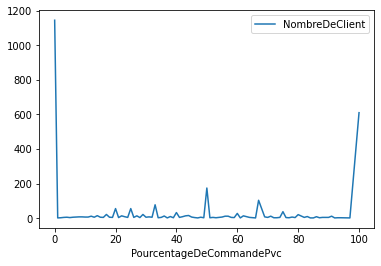

In [224]:
nombreDeClientParPourcentageDeCommande = df_ligne.plot.line(x='PourcentageDeCommandePvc', y='NombreDeClient', rot=0)
nombreDeClientParPourcentageDeCommande